# Summary Notebook

## Preprocessing steps
1. Used autocomplete in domain.com to get all the suburbs (web scraping)
2. Sent 22364 requests across a few days to scrape every property by suburb, in particular by generating and scraping the links
3. Download external datasets: crime, population and income from census, train station distances (## note: ischrone map)
4. Found the location coordinates of property data and used the geospatial suburb data to pinpoint the location of the property
5. Combined other datasets based on similar methods

In [1]:
from IPython.display import IFrame, Image


In [3]:
src = '../plots/crime_by_suburb.png'
Image(filename=src)

FileNotFoundError: [Errno 2] No such file or directory: '../plots/crime_by_suburb.png'

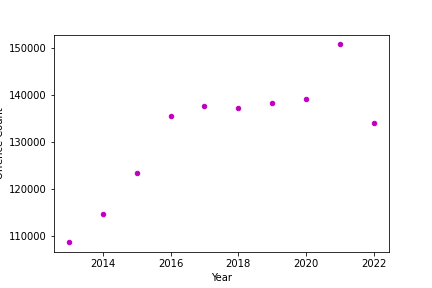

In [4]:
src2 = '../plots/crime_growth.png'
Image(filename=src2) 

In [5]:
src = '../plots/map_max_median_income.html'
IFrame(src=src, width=700, height=600)


In [6]:
src = '../plots/housing_demand.html'
IFrame(src=src, width=700, height=600)

In [7]:
src = '../plots/housing_demand.html'
IFrame(src=src, width=700, height=600)

In [8]:
src = '../plots/isochrome_trains.html'
IFrame(src=src, width=700, height=600)

## Insights on modelling

1. What are the most important internal and external features in predicting rental prices?
feature analysis PCA
Spearman correlation

Internal

The housing location (suburbs, distance to CBD)
Number of bedrooms, baths, and park (area in general)

External

Distance to train stations
Income, crime, etc need to look at the plots

2. What are the top 10 suburbs with the highest predicted growth rate?
Need to follow up with Ash on trees

3. What are the most liveable and affordable suburbs according to your chosen metrics?
Look for suburbs that has low crime rate, high income, low rent price, ideally closer to CBD and train stations that are well-spaced
Might want to standardise by dividing income with rent price

## Prediction
Made linear models for each external dataset (crime, income, and population). We chose this model because we assume that the growth of all these features are approximately linear.

Using data from previous years, predict growth rates and expected values of these statistics for each suburb in 2023, 2024, and 2025.
Using these predictions, we can then input it into the rental data model to see which suburb has the greatest growth rates in terms of rental cost. This operates under the assumption that external dataset growth will give us a good indication on the rental price growth. We found that all features (crime, income, population) increase in the future, unsurprisingly.

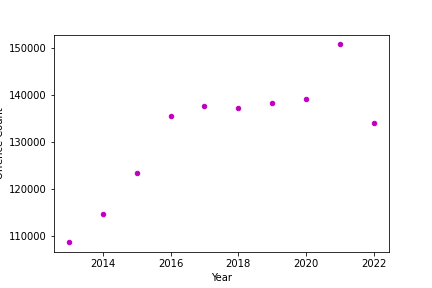

In [13]:
src = '../plots/crime_growth.png'
Image(filename=src)

For the crime data, the year 2022 is removed from the predictor variables because 2022 is not finished yet, and thus the data is giving us lower 2022 values than the values from any other year.

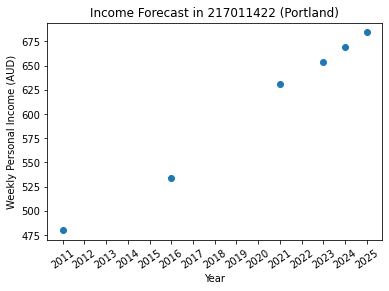

In [14]:
src = '../plots/lm_forecast_example_217011422.png'
Image(filename=src)

Additionally, since there are many suburbs with missing data, we find that many of our predictions need to be extrapolated by using the mean of our known prediction for each future year. A better method in data imputation can maybe be done, such as by considering other factors (e.g., suburbs with higher areas might correlate with higher population), but we decided to impute them with the means due to the time limitation that we have.

## Correlation Analysis

In [10]:
src = '../plots/correlations.png'
Image(filename=src) 

FileNotFoundError: [Errno 2] No such file or directory: '../plots/correlations.png'

In [11]:
src = '../plots/PCA_analysis.png'
Image(filename=src) 

FileNotFoundError: [Errno 2] No such file or directory: '../plots/PCA_analysis.png'

## Modelling

1. Neural Network - Multi layer perceptron
Low accuracy on the overall dataset (R^2 = 0.31).
When suburbs were divided into groups based on distance to CBD, and NN was trained on each of these groups, R^2 increased to 0.51.
Additional feature was created for this, which is the distance between suburb and CBD. The data was also stratified for testing, and grid search was used to find optimal parameters.

2. Tree
Used an XGBoost tree to model all features and tie them into rent prices by suburb. We ended up with a lower R^2 (0.28).


Both tree and neural network automatically perform feature selections. Our finding is that xgboost is not the ideal model, and so it was used to inform us that it may be better to rely on neural network predictions. 

While there are a lot of property data, the number of properties per suburb ends up being quite low since there are many subrubs in Victoria. This explains why NN does not work well when stratified. When we divide these into four rings based on distance to CBD instead of suburbs, we get much better performance. However, this diminishes our ability to predict which suburb grows the most.

for each suburb, we find the average house (average number of beds, baths, etc and round it to nearest int), and from the average house we can make predictions for the price for 2022. Once we have those predictions, we can predict on the average house again with the same number of average beds, baths. And using the crime, income, population data predictions by suburb, this will give us a second value for rent for 2023. Since we have two numbers, we can calculate the growth rate for 2024 and 2025.